# 복수 레이블 분류

1개의 입력이 복수의 카테고리에 속하는 분류 문제

In [1]:
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import accuracy_score

x, y = make_multilabel_classification(n_samples=1000, n_features=7, n_classes=3, n_labels=2, random_state=1)

print(x.shape)
print(y.shape)

print(x[:5])
print(y[:5])

(1000, 7)
(1000, 3)
[[ 4.  4.  6.  6. 10.  2.  7.]
 [ 5.  5.  4. 13.  9.  1. 11.]
 [ 2.  2. 14.  5. 14.  4. 12.]
 [ 5.  5. 12.  2. 14.  8.  9.]
 [ 5. 13.  8.  4.  6. 11. 15.]]
[[1 1 0]
 [0 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [11]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                80        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


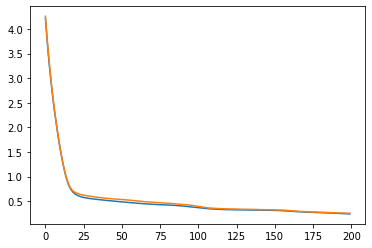

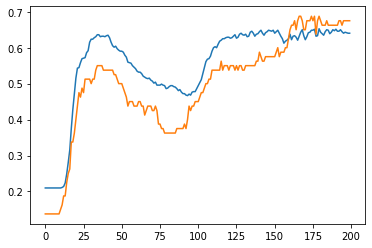

acc = 0.755


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=200, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

y_ = model.predict(test_x)
predicted = y_.round()

from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, predicted)
print("acc =", acc)